# Hepatitis B virus promotes hepatocellular carcinoma (liver cancer) by modulating the immune response to environmental **carcinogens**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving GSE269528_gene.description.csv to GSE269528_gene.description.csv


In [2]:
import pandas as pd

df = pd.read_csv('GSE269528_gene.description.csv')
df.head()

,gene_id,HBV_DEN_1_fpkm,HBV_DEN_2_fpkm,HBV_DEN_3_fpkm,sham_DEN_1_fpkm,sham_DEN_2_fpkm,sham_DEN_3_fpkm,gene_name,gene_chr,gene_start,gene_end,gene_strand,gene_length,gene_biotype,gene_description,tf_family
0,ENSMUSG00000064351,22435.171410,38812.304970,42950.332190,33844.537090,36966.485910,44977.253980,mt-Co1,MT,5328,6872,+,1545,protein_coding,mitochondrially encoded cytochrome c oxidase I...,-
1,ENSMUSG00000029368,21933.194510,20988.097840,21511.021950,26032.219630,27007.945870,18307.252550,Alb,5,90460897,90476602,+,2342,protein_coding,albumin [Source:MGI Symbol;Acc:MGI:87991],-
2,ENSMUSG00000064370,11850.518060,19972.279210,20742.029960,15315.485920,17699.004830,21779.866120,mt-Cytb,MT,14145,15288,+,1144,protein_coding,mitochondrially encoded cytochrome b [Source:M...,-
3,ENSMUSG00000002985,6927.991492,5528.236619,5260.988799,7894.652025,7839.395532,6534.934279,Apoe,7,19696109,19699188,-,2138,protein_coding,apolipoprotein E [Source:MGI Symbol;Acc:MGI:88...,-
4,ENSMUSG00000064367,4493.771192,7307.134272,7219.798435,5731.871224,6285.170884,7513.930408,mt-Nd5,MT,11742,13565,+,1824,protein_coding,mitochondrially encoded NADH dehydrogenase 5 [...,-


In [3]:
!pip install pydeseq2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 8.4 MB/s eta 0:00:00


In [4]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd

In [5]:
 counts = pd.read_csv('GSE269528_gene.description.csv')
 counts

,gene_id,HBV_DEN_1_fpkm,HBV_DEN_2_fpkm,HBV_DEN_3_fpkm,sham_DEN_1_fpkm,sham_DEN_2_fpkm,sham_DEN_3_fpkm,gene_name,gene_chr,gene_start,gene_end,gene_strand,gene_length,gene_biotype,gene_description,tf_family
0,ENSMUSG00000064351,22435.171410,38812.304970,42950.332190,33844.537090,36966.485910,44977.253980,mt-Co1,MT,5328,6872,+,1545,protein_coding,mitochondrially encoded cytochrome c oxidase I...,-
1,ENSMUSG00000029368,21933.194510,20988.097840,21511.021950,26032.219630,27007.945870,18307.252550,Alb,5,90460897,90476602,+,2342,protein_coding,albumin [Source:MGI Symbol;Acc:MGI:87991],-
2,ENSMUSG00000064370,11850.518060,19972.279210,20742.029960,15315.485920,17699.004830,21779.866120,mt-Cytb,MT,14145,15288,+,1144,protein_coding,mitochondrially encoded cytochrome b [Source:M...,-
3,ENSMUSG00000002985,6927.991492,5528.236619,5260.988799,7894.652025,7839.395532,6534.934279,Apoe,7,19696109,19699188,-,2138,protein_coding,apolipoprotein E [Source:MGI Symbol;Acc:MGI:88...,-
4,ENSMUSG00000064367,4493.771192,7307.134272,7219.798435,5731.871224,6285.170884,7513.930408,mt-Nd5,MT,11742,13565,+,1824,protein_coding,mitochondrially encoded NADH dehydrogenase 5 [...,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54527,ENSMUSG00000099278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CR524822.1,GL456239.1,38438,38535,+,98,miRNA,NaN,-
54528,ENSMUSG00000095434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CAAA01205117.2,GL456385.1,31243,31343,+,101,miRNA,NaN,-
54529,ENSMUSG00000094431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CAAA01205117.1,GL456385.1,32719,32818,+,100,miRNA,NaN,-
54530,ENSMUSG00000094621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CAAA01098150.1,GL456372.1,13262,13382,-,121,miRNA,NaN,-


In [6]:
counts = counts.set_index('gene_id')
counts

,HBV_DEN_1_fpkm,HBV_DEN_2_fpkm,HBV_DEN_3_fpkm,sham_DEN_1_fpkm,sham_DEN_2_fpkm,sham_DEN_3_fpkm,gene_name,gene_chr,gene_start,gene_end,gene_strand,gene_length,gene_biotype,gene_description,tf_family
gene_id,,,,,,,,,,,,,,,
ENSMUSG00000064351,22435.171410,38812.304970,42950.332190,33844.537090,36966.485910,44977.253980,mt-Co1,MT,5328,6872,+,1545,protein_coding,mitochondrially encoded cytochrome c oxidase I...,-
ENSMUSG00000029368,21933.194510,20988.097840,21511.021950,26032.219630,27007.945870,18307.252550,Alb,5,90460897,90476602,+,2342,protein_coding,albumin [Source:MGI Symbol;Acc:MGI:87991],-
ENSMUSG00000064370,11850.518060,19972.279210,20742.029960,15315.485920,17699.004830,21779.866120,mt-Cytb,MT,14145,15288,+,1144,protein_coding,mitochondrially encoded cytochrome b [Source:M...,-
ENSMUSG00000002985,6927.991492,5528.236619,5260.988799,7894.652025,7839.395532,6534.934279,Apoe,7,19696109,19699188,-,2138,protein_coding,apolipoprotein E [Source:MGI Symbol;Acc:MGI:88...,-
ENSMUSG00000064367,4493.771192,7307.134272,7219.798435,5731.871224,6285.170884,7513.930408,mt-Nd5,MT,11742,13565,+,1824,protein_coding,mitochondrially encoded NADH dehydrogenase 5 [...,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000099278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CR524822.1,GL456239.1,38438,38535,+,98,miRNA,NaN,-
ENSMUSG00000095434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CAAA01205117.2,GL456385.1,31243,31343,+,101,miRNA,NaN,-
ENSMUSG00000094431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CAAA01205117.1,GL456385.1,32719,32818,+,100,miRNA,NaN,-


In [7]:
numeric_counts = counts.select_dtypes(include = 'number')


In [8]:
counts = counts[numeric_counts.sum(axis = 1) >0]
counts

,HBV_DEN_1_fpkm,HBV_DEN_2_fpkm,HBV_DEN_3_fpkm,sham_DEN_1_fpkm,sham_DEN_2_fpkm,sham_DEN_3_fpkm,gene_name,gene_chr,gene_start,gene_end,gene_strand,gene_length,gene_biotype,gene_description,tf_family
gene_id,,,,,,,,,,,,,,,
ENSMUSG00000064351,22435.171410,38812.304970,42950.332190,33844.537090,36966.485910,44977.253980,mt-Co1,MT,5328,6872,+,1545,protein_coding,mitochondrially encoded cytochrome c oxidase I...,-
ENSMUSG00000029368,21933.194510,20988.097840,21511.021950,26032.219630,27007.945870,18307.252550,Alb,5,90460897,90476602,+,2342,protein_coding,albumin [Source:MGI Symbol;Acc:MGI:87991],-
ENSMUSG00000064370,11850.518060,19972.279210,20742.029960,15315.485920,17699.004830,21779.866120,mt-Cytb,MT,14145,15288,+,1144,protein_coding,mitochondrially encoded cytochrome b [Source:M...,-
ENSMUSG00000002985,6927.991492,5528.236619,5260.988799,7894.652025,7839.395532,6534.934279,Apoe,7,19696109,19699188,-,2138,protein_coding,apolipoprotein E [Source:MGI Symbol;Acc:MGI:88...,-
ENSMUSG00000064367,4493.771192,7307.134272,7219.798435,5731.871224,6285.170884,7513.930408,mt-Nd5,MT,11742,13565,+,1824,protein_coding,mitochondrially encoded NADH dehydrogenase 5 [...,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000099278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CR524822.1,GL456239.1,38438,38535,+,98,miRNA,NaN,-
ENSMUSG00000095434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CAAA01205117.2,GL456385.1,31243,31343,+,101,miRNA,NaN,-
ENSMUSG00000094431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CAAA01205117.1,GL456385.1,32719,32818,+,100,miRNA,NaN,-


In [9]:
counts = counts.T
counts

gene_id,ENSMUSG00000064351,ENSMUSG00000029368,ENSMUSG00000064370,ENSMUSG00000002985,ENSMUSG00000064367,ENSMUSG00000064345,ENSMUSG00000064363,ENSMUSG00000064341,ENSMUSG00000037071,ENSMUSG00000058207,...,ENSMUSG00000095092,ENSMUSG00000079794,ENSMUSG00000094799,ENSMUSG00000095019,ENSMUSG00000094915,ENSMUSG00000099278,ENSMUSG00000095434,ENSMUSG00000094431,ENSMUSG00000094621,ENSMUSG00000098647
HBV_DEN_1_fpkm,22435.17141,21933.19451,11850.51806,6927.991492,4493.771192,7045.337786,4987.283563,7049.175907,1074.896579,3260.471699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HBV_DEN_2_fpkm,38812.30497,20988.09784,19972.27921,5528.236619,7307.134272,12030.84573,8163.21042,13814.09947,943.653897,1920.289432,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HBV_DEN_3_fpkm,42950.33219,21511.02195,20742.02996,5260.988799,7219.798435,11251.68246,7158.961329,12572.84104,954.441574,1934.774437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sham_DEN_1_fpkm,33844.53709,26032.21963,15315.48592,7894.652025,5731.871224,9251.704212,6436.925164,9260.95976,2086.609828,5794.73413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sham_DEN_2_fpkm,36966.48591,27007.94587,17699.00483,7839.395532,6285.170884,10862.08556,6751.750813,10566.11794,2182.483598,5533.670263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sham_DEN_3_fpkm,44977.25398,18307.25255,21779.86612,6534.934279,7513.930408,12438.78995,8632.074013,11872.12238,1652.907756,5498.525184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gene_name,mt-Co1,Alb,mt-Cytb,Apoe,mt-Nd5,mt-Nd2,mt-Nd4,mt-Nd1,Scd1,Serpina3k,...,AC125149.5,AC125149.2,AC125149.4,AC234645.1,AC168977.2,CR524822.1,CAAA01205117.2,CAAA01205117.1,CAAA01098150.1,CAAA01064564.1
gene_chr,MT,5,MT,7,MT,MT,MT,MT,19,12,...,GL456210.1,GL456210.1,GL456210.1,JH584303.1,GL456212.1,GL456239.1,GL456385.1,GL456385.1,GL456372.1,GL456381.1
gene_start,5328,90460897,14145,19696109,11742,3914,10167,2751,44394451,104338486,...,108390,135395,147792,81607,31967,38438,31243,32719,13262,16623
gene_end,6872,90476602,15288,19699188,13565,4951,11544,3707,44407709,104346144,...,110303,136519,149707,82689,34932,38535,31343,32818,13382,16721


In [10]:
counts = pd.read_csv('GSE269528_gene.description.csv')
counts = counts.set_index('gene_id')
numeric_counts = counts.select_dtypes(include = 'number')
counts = counts[numeric_counts.sum(axis = 1) > 0]
counts = counts.T
counts = counts.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [11]:
pd.DataFrame(zip(counts.index, ['C', 'C','C', 'RS', 'RS', 'RS']), columns = ['sample', 'Condition'])

,sample,Condition
0,HBV_DEN_1_fpkm,C
1,HBV_DEN_2_fpkm,C
2,HBV_DEN_3_fpkm,C
3,sham_DEN_1_fpkm,RS
4,sham_DEN_2_fpkm,RS
5,sham_DEN_3_fpkm,RS


In [12]:
metadata= pd.DataFrame(zip(counts.index, ['C', 'C','C', 'RS', 'RS', 'RS']), columns = ['sample', 'Condition'])
metadata

,sample,Condition
0,HBV_DEN_1_fpkm,C
1,HBV_DEN_2_fpkm,C
2,HBV_DEN_3_fpkm,C
3,sham_DEN_1_fpkm,RS
4,sham_DEN_2_fpkm,RS
5,sham_DEN_3_fpkm,RS


In [13]:
metadata= metadata.set_index('sample')
metadata

,Condition
sample,
HBV_DEN_1_fpkm,C
HBV_DEN_2_fpkm,C
HBV_DEN_3_fpkm,C
sham_DEN_1_fpkm,RS
sham_DEN_2_fpkm,RS
sham_DEN_3_fpkm,RS


In [14]:
print(f"Counts shape: {counts.shape}")

Counts shape: (15, 54532)


In [15]:
print(f"Metadata shape: {metadata.shape}")

Metadata shape: (6, 1)


In [16]:
print(f"Counts index: {counts.index.tolist()}")

Counts index: ['HBV_DEN_1_fpkm', 'HBV_DEN_2_fpkm', 'HBV_DEN_3_fpkm', 'sham_DEN_1_fpkm', 'sham_DEN_2_fpkm', 'sham_DEN_3_fpkm', 'gene_name', 'gene_chr', 'gene_start', 'gene_end', 'gene_strand', 'gene_length', 'gene_biotype', 'gene_description', 'tf_family']


In [17]:
print(f"Metadata index: {metadata.index.tolist()}")


Metadata index: ['HBV_DEN_1_fpkm', 'HBV_DEN_2_fpkm', 'HBV_DEN_3_fpkm', 'sham_DEN_1_fpkm', 'sham_DEN_2_fpkm', 'sham_DEN_3_fpkm']


In [18]:
# Ensure the indices are identical before creating DeseqDataSet
if not counts.index.equals(metadata.index):
    print("Warning: Counts and metadata indices do not match. Aligning indices.")
    # This will drop samples in counts that are not in metadata, or vice-versa.
    # If you have a full metadata file, you might merge/join instead.
    common_samples = counts.index.intersection(metadata.index)
    counts = counts.loc[common_samples]
    metadata = metadata.loc[common_samples]

    if counts.empty or metadata.empty:
        raise ValueError("No common samples found between counts and metadata after alignment.")

    print(f"Aligned Counts shape: {counts.shape}")
    print(f"Aligned Metadata shape: {metadata.shape}")

Aligned Counts shape: (6, 54532)
Aligned Metadata shape: (6, 1)


In [19]:
# Check for NaNs in counts again after any alignment
if counts.isnull().any().any():
    print("Warning: NaNs found in the counts matrix. Dropping columns with NaNs.")
    counts = counts.dropna(axis=1)
    # Also re-check the dtype after dropping columns
    counts = counts.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [20]:
dds = DeseqDataSet(counts=counts, metadata=metadata, design_factors="Condition")

print("DeseqDataSet created successfully.")

DeseqDataSet created successfully.


<ipython-input-20-336888a12a39>:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=counts, metadata=metadata, design_factors="Condition")


In [21]:
dds.obs

,Condition
HBV_DEN_1_fpkm,C
HBV_DEN_2_fpkm,C
HBV_DEN_3_fpkm,C
sham_DEN_1_fpkm,RS
sham_DEN_2_fpkm,RS
sham_DEN_3_fpkm,RS


In [22]:
dds.X

array([[22435, 21933, 11850, ...,     0,     0,     0],
       [38812, 20988, 19972, ...,     0,     0,     0],
       [42950, 21511, 20742, ...,     0,     0,     0],
       [33844, 26032, 15315, ...,     0,     0,     0],
       [36966, 27007, 17699, ...,     0,     0,     0],
       [44977, 18307, 21779, ...,     0,     0,     0]])

In [23]:
dds.var

""
gene_id
ENSMUSG00000064351
ENSMUSG00000029368
ENSMUSG00000064370
ENSMUSG00000002985
ENSMUSG00000064367
...
ENSMUSG00000099278
ENSMUSG00000095434
ENSMUSG00000094431


In [24]:
dds.deseq2()

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.00 seconds.

Fitting dispersion trend curve...
... done in 0.21 seconds.

Fitting MAP dispersions...
... done in 10.30 seconds.

Fitting LFCs...
... done in 5.62 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.



In [25]:
dds

AnnData object with n_obs × n_vars = 6 × 54532
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [26]:
stat_res = DeseqStats(dds,n_cpus=6, contrast = ('Condition', 'RS', 'C'))

In [27]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition RS vs C
                        baseMean  log2FoldChange     lfcSE      stat  \
gene_id                                                                
ENSMUSG00000064351  36604.395633        0.035527  0.280737  0.126548   
ENSMUSG00000029368  22579.390943        0.036947  0.178825  0.206611   
ENSMUSG00000064370  17884.087558       -0.056630  0.269759 -0.209928   
ENSMUSG00000002985   6627.793166        0.220897  0.151522  1.457849   
ENSMUSG00000064367   6423.299147       -0.077811  0.240311 -0.323793   
...                          ...             ...       ...       ...   
ENSMUSG00000099278      0.000000             NaN       NaN       NaN   
ENSMUSG00000095434      0.000000             NaN       NaN       NaN   
ENSMUSG00000094431      0.000000             NaN       NaN       NaN   
ENSMUSG00000094621      0.000000             NaN       NaN       NaN   
ENSMUSG00000098647      0.000000             NaN       NaN       NaN   

       

... done in 15.03 seconds.



In [28]:
res = stat_res.results_df

In [29]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSMUSG00000064351,36604.395633,0.035527,0.280737,0.126548,0.899298,0.992201
ENSMUSG00000029368,22579.390943,0.036947,0.178825,0.206611,0.836314,0.992201
ENSMUSG00000064370,17884.087558,-0.056630,0.269759,-0.209928,0.833724,0.992201
ENSMUSG00000002985,6627.793166,0.220897,0.151522,1.457849,0.144882,0.636558
ENSMUSG00000064367,6423.299147,-0.077811,0.240311,-0.323793,0.746095,0.992201
...,...,...,...,...,...,...
ENSMUSG00000099278,0.000000,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000095434,0.000000,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000094431,0.000000,NaN,NaN,NaN,NaN,NaN


In [30]:
print(res.index[:5])

Index(['ENSMUSG00000064351', 'ENSMUSG00000029368', 'ENSMUSG00000064370',
       'ENSMUSG00000002985', 'ENSMUSG00000064367'],
      dtype='object', name='gene_id')


In [31]:
!pip install sanbomics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.2 MB/s eta 0:00:00


In [32]:
from sanbomics.tools import id_map

In [33]:
mapper =id_map(species = 'mouse')

In [34]:
mapper.mapper

{'ENSMUSG00000064341': 'Mtnd1',
 'ENSMUSG00000064345': 'mt-Nd2',
 'ENSMUSG00000064351': 'Mtco1',
 'ENSMUSG00000064354': 'Mtco2',
 'ENSMUSG00000064356': 'Mtatp8',
 'ENSMUSG00000064357': 'Mtatp6',
 'ENSMUSG00000064358': 'mt-Co3',
 'ENSMUSG00000064360': 'mt-Nd3',
 'ENSMUSG00000065947': 'Mtnd4l',
 'ENSMUSG00000064363': 'Mtnd4',
 'ENSMUSG00000064367': 'Mtnd5',
 'ENSMUSG00000064368': 'Mtnd6',
 'ENSMUSG00000064370': 'Mt-Cyb',
 'ENSMUSG00000095742': 'CAAA01147332.1',
 'ENSMUSG00000095019': 'AC234645.1',
 'ENSMUSG00000095041': 'AC149090.1',
 'ENSMUSG00000095666': 'AC164084.2',
 'ENSMUSG00000094303': 'AC165294.1',
 'ENSMUSG00000094915': 'AC168977.2',
 'ENSMUSG00000094836': 'AC123873.3',
 'ENSMUSG00000096776': 'Vmn1r186',
 'ENSMUSG00000094722': 'AC125178.1',
 'ENSMUSG00000095250': 'AC133103.4',
 'ENSMUSG00000079800': 'A530040E14Rik',
 'ENSMUSG00000096244': 'AC102264.1',
 'ENSMUSG00000079808': 'AC168977.1',
 'ENSMUSG00000095787': 'AC133103.6',
 'ENSMUSG00000095092': 'AC125149.5',
 'ENSMUSG00000096

In [35]:
res['Symbol'] = res.index.map(mapper.mapper)

In [36]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
gene_id,,,,,,,
ENSMUSG00000064351,36604.395633,0.035527,0.280737,0.126548,0.899298,0.992201,Mtco1
ENSMUSG00000029368,22579.390943,0.036947,0.178825,0.206611,0.836314,0.992201,Alb
ENSMUSG00000064370,17884.087558,-0.056630,0.269759,-0.209928,0.833724,0.992201,Mt-Cyb
ENSMUSG00000002985,6627.793166,0.220897,0.151522,1.457849,0.144882,0.636558,Apoe
ENSMUSG00000064367,6423.299147,-0.077811,0.240311,-0.323793,0.746095,0.992201,Mtnd5
...,...,...,...,...,...,...,...
ENSMUSG00000099278,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000095434,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000094431,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
res = res[res.baseMean >=1]

In [38]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
gene_id,,,,,,,
ENSMUSG00000064351,36604.395633,0.035527,0.280737,0.126548,0.899298,0.992201,Mtco1
ENSMUSG00000029368,22579.390943,0.036947,0.178825,0.206611,0.836314,0.992201,Alb
ENSMUSG00000064370,17884.087558,-0.056630,0.269759,-0.209928,0.833724,0.992201,Mt-Cyb
ENSMUSG00000002985,6627.793166,0.220897,0.151522,1.457849,0.144882,0.636558,Apoe
ENSMUSG00000064367,6423.299147,-0.077811,0.240311,-0.323793,0.746095,0.992201,Mtnd5
...,...,...,...,...,...,...,...
ENSMUSG00000076618,1.192234,-1.437087,1.626524,-0.883532,0.376949,NaN,Ighj4
ENSMUSG00000076484,1.033127,-2.342569,2.666829,-0.878410,0.379721,NaN,Trbj1-2
ENSMUSG00000091041,1.019178,-2.324579,1.923320,-1.208629,0.226806,NaN,Gm17720


In [39]:
sigs = res[(res.padj < 0.05)& (abs(res.log2FoldChange) > 0.5)]

In [40]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
gene_id,,,,,,,
ENSMUSG00000037071,1462.165872,0.884799,0.146422,6.042793,1.514689e-09,2.731101e-07,Scd1
ENSMUSG00000058207,3921.347874,1.134693,0.231550,4.900420,9.563203e-07,6.141410e-05,Serpina3k
ENSMUSG00000066154,3400.811263,2.339303,0.415369,5.631863,1.782738e-08,2.321521e-06,Mup3
ENSMUSG00000005681,8460.630237,0.605162,0.141415,4.279323,1.874623e-05,6.708575e-04,Apoa2
ENSMUSG00000022868,2570.949546,-0.532804,0.111141,-4.793945,1.635333e-06,9.349316e-05,Ahsg
...,...,...,...,...,...,...,...
ENSMUSG00000035186,5.873643,-4.113452,1.120063,-3.672519,2.401710e-04,5.273248e-03,Ubd
ENSMUSG00000082676,14.064990,-5.421607,1.209549,-4.482336,7.383027e-06,3.328041e-04,NaN
ENSMUSG00000098330,7.364391,4.344994,1.226831,3.541641,3.976458e-04,8.105058e-03,NaN


In [41]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 140.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [42]:
import scanpy as sc

In [43]:
dds

AnnData object with n_obs × n_vars = 6 × 54532
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [44]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 146.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.11.1 requires scikit-learn<1.6.0,>=1.1, but you have scikit-learn 1.6.1 which is incompatible.


In [45]:
sc.tl.pca(dds)

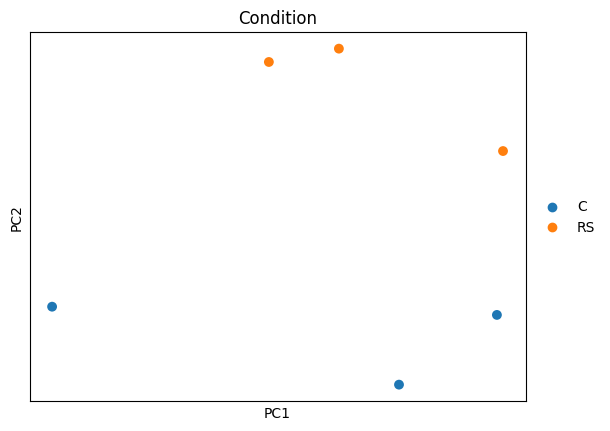

In [46]:
sc.pl.pca (dds, color= 'Condition', size =200)

In [47]:
!pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 11.8 MB/s eta 0:00:00


In [48]:
import gseapy as gp
from gseapy.plot import gseaplot

In [49]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
gene_id,,,,,,,
ENSMUSG00000064351,36604.395633,0.035527,0.280737,0.126548,0.899298,0.992201,Mtco1
ENSMUSG00000029368,22579.390943,0.036947,0.178825,0.206611,0.836314,0.992201,Alb
ENSMUSG00000064370,17884.087558,-0.056630,0.269759,-0.209928,0.833724,0.992201,Mt-Cyb
ENSMUSG00000002985,6627.793166,0.220897,0.151522,1.457849,0.144882,0.636558,Apoe
ENSMUSG00000064367,6423.299147,-0.077811,0.240311,-0.323793,0.746095,0.992201,Mtnd5
...,...,...,...,...,...,...,...
ENSMUSG00000076618,1.192234,-1.437087,1.626524,-0.883532,0.376949,NaN,Ighj4
ENSMUSG00000076484,1.033127,-2.342569,2.666829,-0.878410,0.379721,NaN,Trbj1-2
ENSMUSG00000091041,1.019178,-2.324579,1.923320,-1.208629,0.226806,NaN,Gm17720


In [50]:
ranking = res[['Symbol', 'stat']].dropna().sort_values ('stat', ascending = False)

In [51]:
ranking

,Symbol,stat
gene_id,,
ENSMUSG00000060803,Gstp1,14.239040
ENSMUSG00000024863,Mbl2,11.276148
ENSMUSG00000096674,Mup15,8.657791
ENSMUSG00000038754,Elovl3,8.030280
ENSMUSG00000041698,Slco1a1,7.929623
...,...,...
ENSMUSG00000036594,H2-Aa,-7.168751
ENSMUSG00000000031,H19,-7.197417
ENSMUSG00000060586,H2-Eb1,-7.534003


In [52]:
ranking = ranking.drop_duplicates('Symbol')

In [53]:
ranking

,Symbol,stat
gene_id,,
ENSMUSG00000060803,Gstp1,14.239040
ENSMUSG00000024863,Mbl2,11.276148
ENSMUSG00000096674,Mup15,8.657791
ENSMUSG00000038754,Elovl3,8.030280
ENSMUSG00000041698,Slco1a1,7.929623
...,...,...
ENSMUSG00000036594,H2-Aa,-7.168751
ENSMUSG00000000031,H19,-7.197417
ENSMUSG00000060586,H2-Eb1,-7.534003


Run prerank with gene_sets as alist of gene set names

In [54]:
Manual_selection = {'Gene_of_int': ['Gstp', 'Mbl2', 'Mup15', 'ElovI3', 'Slco1a1']}

In [66]:
Pre_res = gp.prerank(rnk = ranking, gene_sets = ['GO_Biological_Process_2021', Manual_selection], seed=6, permutation_num=500)

2025-05-20 07:58:10,599 [WARNING] Duplicated values found in preranked stats: 36.08% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


Extract term results into a DataFrame

In [68]:
out = []
for term in Pre_res.results:
    out.append([
        term,
        Pre_res.results[term]['fdr'],
        Pre_res.results[term]['es'],
        Pre_res.results[term]['nes']
    ])

out_df = pd.DataFrame(out, columns=['Term', 'fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop=True)

In [69]:
out_df.sort_values('nes')

,Term,fdr,es,nes
10,GO_Biological_Process_2021__extracellular matr...,0.0,-0.765011,-2.941330
1,GO_Biological_Process_2021__extracellular stru...,0.0,-0.789514,-2.913866
15,GO_Biological_Process_2021__external encapsula...,0.0,-0.791019,-2.892729
12,GO_Biological_Process_2021__collagen fibril or...,0.0,-0.800090,-2.534285
3,GO_Biological_Process_2021__SRP-dependent cotr...,0.0,-0.678929,-2.465508
...,...,...,...,...
16,GO_Biological_Process_2021__long-chain fatty a...,0.0,0.705786,2.226410
7,GO_Biological_Process_2021__fatty acid beta-ox...,0.0,0.741645,2.367961
4,GO_Biological_Process_2021__cellular amino aci...,0.0,0.691668,2.411887
18,GO_Biological_Process_2021__fatty acid catabol...,0.0,0.722792,2.439973


Sort by NES and get top term

In [70]:
out_df.sort_values('nes').iloc[0].Term

'GO_Biological_Process_2021__extracellular matrix organization (GO:0030198)'

In [64]:
term_name = 'GO_Biological_Process_2021__extracellular matrix organization (GO:0030198)'


Prepare plot arguments without duplicating 'term'

[<Axes: xlabel='Gene Rank'>, <Axes: ylabel='Enrichment Score'>]

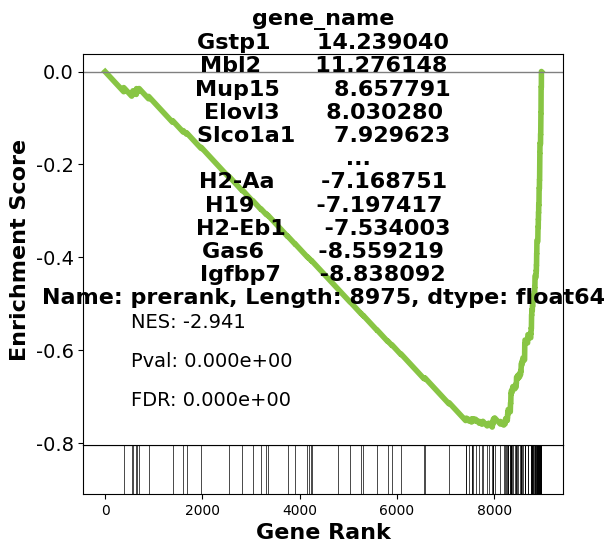

In [73]:
# Prepare plot arguments without duplicating 'term'
gseaplot(Pre_res.ranking,
         ** Pre_res.results['GO_Biological_Process_2021__extracellular matrix organization (GO:0030198)'])

Plot other graph

In [74]:
import numpy as np
import seaborn as sns

In [75]:
dds


AnnData object with n_obs × n_vars = 6 × 54532
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable', 'X_pca'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [76]:
dds.layers['normed_counts']

array([[22911.03960545, 22398.38786121, 12101.44057609, ...,
            0.        ,     0.        ,     0.        ],
       [40718.25384152, 22018.82695109, 20952.92604666, ...,
            0.        ,     0.        ,     0.        ],
       [44831.97954437, 22453.56721721, 21650.87123887, ...,
            0.        ,     0.        ,     0.        ],
       [32677.26769946, 25134.57725896, 14787.03329445, ...,
            0.        ,     0.        ,     0.        ],
       [35616.46316351, 26021.04151536, 17052.8534743 , ...,
            0.        ,     0.        ,     0.        ],
       [42871.36994612, 17449.94485189, 20759.40071718, ...,
            0.        ,     0.        ,     0.        ]])

Normed count with log1p value to plot the heatmap

In [78]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [79]:
dds

AnnData object with n_obs × n_vars = 6 × 54532
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable', 'X_pca'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

In [80]:
dds.layers['log1p']

array([[10.0394178 , 10.01678891,  9.40116241, ...,  0.        ,
         0.        ,  0.        ],
       [10.61445633,  9.99969855,  9.95008131, ...,  0.        ,
         0.        ,  0.        ],
       [10.7106993 , 10.01924931,  9.98284716, ...,  0.        ,
         0.        ,  0.        ],
       [10.39446554, 10.13203954,  9.60157357, ...,  0.        ,
         0.        ,  0.        ],
       [10.48059133, 10.16669921,  9.74413147, ...,  0.        ,
         0.        ,  0.        ],
       [10.66598284,  9.76714907,  9.94080264, ...,  0.        ,
         0.        ,  0.        ]])

Ploting the heatmap by using log1p value from normed_counts

In [81]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
gene_id,,,,,,,
ENSMUSG00000037071,1462.165872,0.884799,0.146422,6.042793,1.514689e-09,2.731101e-07,Scd1
ENSMUSG00000058207,3921.347874,1.134693,0.231550,4.900420,9.563203e-07,6.141410e-05,Serpina3k
ENSMUSG00000066154,3400.811263,2.339303,0.415369,5.631863,1.782738e-08,2.321521e-06,Mup3
ENSMUSG00000005681,8460.630237,0.605162,0.141415,4.279323,1.874623e-05,6.708575e-04,Apoa2
ENSMUSG00000022868,2570.949546,-0.532804,0.111141,-4.793945,1.635333e-06,9.349316e-05,Ahsg
...,...,...,...,...,...,...,...
ENSMUSG00000035186,5.873643,-4.113452,1.120063,-3.672519,2.401710e-04,5.273248e-03,Ubd
ENSMUSG00000082676,14.064990,-5.421607,1.209549,-4.482336,7.383027e-06,3.328041e-04,NaN
ENSMUSG00000098330,7.364391,4.344994,1.226831,3.541641,3.976458e-04,8.105058e-03,NaN


Makes the subset of the gene set. only for significant genes

In [82]:
dds_sigs = dds[:,sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 6 × 334
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable', 'X_pca'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

We need three things from dds to make the heatmap- log1p, obs.name and obs.var

In [83]:
dds_sigs.var_names

Index(['ENSMUSG00000037071', 'ENSMUSG00000058207', 'ENSMUSG00000066154',
       'ENSMUSG00000005681', 'ENSMUSG00000022868', 'ENSMUSG00000028603',
       'ENSMUSG00000030895', 'ENSMUSG00000025479', 'ENSMUSG00000027559',
       'ENSMUSG00000027187',
       ...
       'ENSMUSG00000018623', 'ENSMUSG00000024538', 'ENSMUSG00000098867',
       'ENSMUSG00000022947', 'ENSMUSG00000079017', 'ENSMUSG00000035186',
       'ENSMUSG00000082676', 'ENSMUSG00000098330', 'ENSMUSG00000084309',
       'ENSMUSG00000056071'],
      dtype='object', name='gene_id', length=334)

In [84]:
dds_sigs.obs_names

Index(['HBV_DEN_1_fpkm', 'HBV_DEN_2_fpkm', 'HBV_DEN_3_fpkm', 'sham_DEN_1_fpkm',
       'sham_DEN_2_fpkm', 'sham_DEN_3_fpkm'],
      dtype='object')

In [86]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

In [87]:
grapher

,HBV_DEN_1_fpkm,HBV_DEN_2_fpkm,HBV_DEN_3_fpkm,sham_DEN_1_fpkm,sham_DEN_2_fpkm,sham_DEN_3_fpkm
gene_id,,,,,,
ENSMUSG00000037071,7.001053,6.898024,6.904552,7.608418,7.651282,7.362430
ENSMUSG00000058207,8.110779,7.608524,7.610726,8.629675,8.581482,8.564383
ENSMUSG00000066154,7.568487,6.555155,6.593905,8.612444,8.571859,8.742025
ENSMUSG00000005681,8.946980,8.818224,8.647715,9.241424,9.283710,9.164795
ENSMUSG00000022868,7.928641,8.043912,8.081384,7.689822,7.705662,7.549976
...,...,...,...,...,...,...
ENSMUSG00000035186,2.097838,2.683655,2.604600,0.675760,0.674725,0.000000
ENSMUSG00000082676,2.215910,3.601957,3.679366,0.675760,0.674725,0.000000
ENSMUSG00000098330,0.703701,0.000000,0.714820,2.166102,2.164235,3.321041


Plot with seaborn clustermap

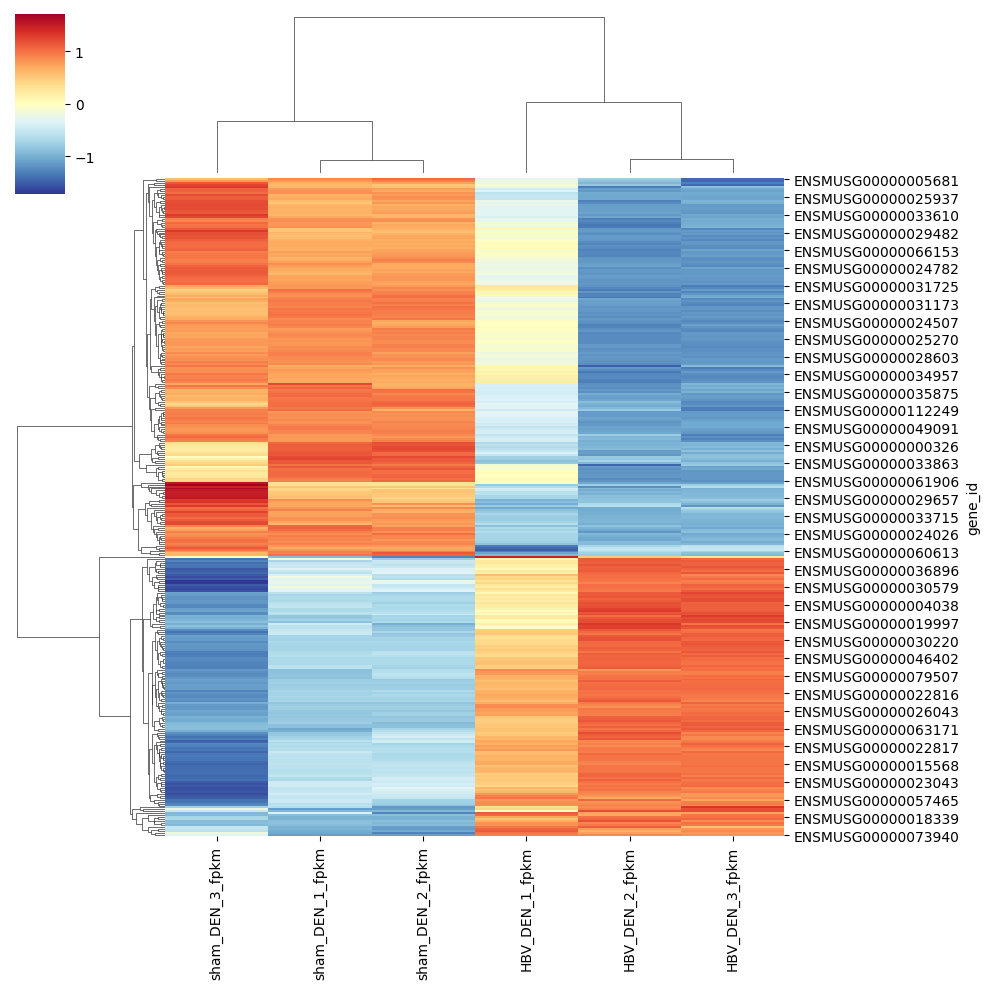

In [89]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [90]:
grapher.index = grapher.index.map(mapper.mapper)

In [91]:
grapher

,HBV_DEN_1_fpkm,HBV_DEN_2_fpkm,HBV_DEN_3_fpkm,sham_DEN_1_fpkm,sham_DEN_2_fpkm,sham_DEN_3_fpkm
gene_id,,,,,,
Scd1,7.001053,6.898024,6.904552,7.608418,7.651282,7.362430
Serpina3k,8.110779,7.608524,7.610726,8.629675,8.581482,8.564383
Mup3,7.568487,6.555155,6.593905,8.612444,8.571859,8.742025
Apoa2,8.946980,8.818224,8.647715,9.241424,9.283710,9.164795
Ahsg,7.928641,8.043912,8.081384,7.689822,7.705662,7.549976
...,...,...,...,...,...,...
Ubd,2.097838,2.683655,2.604600,0.675760,0.674725,0.000000
NaN,2.215910,3.601957,3.679366,0.675760,0.674725,0.000000
NaN,0.703701,0.000000,0.714820,2.166102,2.164235,3.321041


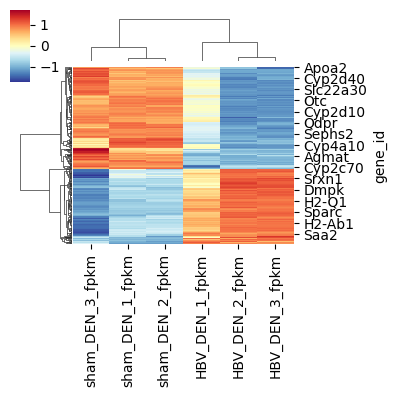

In [92]:
ax=sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r', figsize=(4,4))

In [93]:
from sanbomics.plots import volcano

In [94]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
gene_id,,,,,,,
ENSMUSG00000064351,36604.395633,0.035527,0.280737,0.126548,0.899298,0.992201,Mtco1
ENSMUSG00000029368,22579.390943,0.036947,0.178825,0.206611,0.836314,0.992201,Alb
ENSMUSG00000064370,17884.087558,-0.056630,0.269759,-0.209928,0.833724,0.992201,Mt-Cyb
ENSMUSG00000002985,6627.793166,0.220897,0.151522,1.457849,0.144882,0.636558,Apoe
ENSMUSG00000064367,6423.299147,-0.077811,0.240311,-0.323793,0.746095,0.992201,Mtnd5
...,...,...,...,...,...,...,...
ENSMUSG00000076618,1.192234,-1.437087,1.626524,-0.883532,0.376949,NaN,Ighj4
ENSMUSG00000076484,1.033127,-2.342569,2.666829,-0.878410,0.379721,NaN,Trbj1-2
ENSMUSG00000091041,1.019178,-2.324579,1.923320,-1.208629,0.226806,NaN,Gm17720


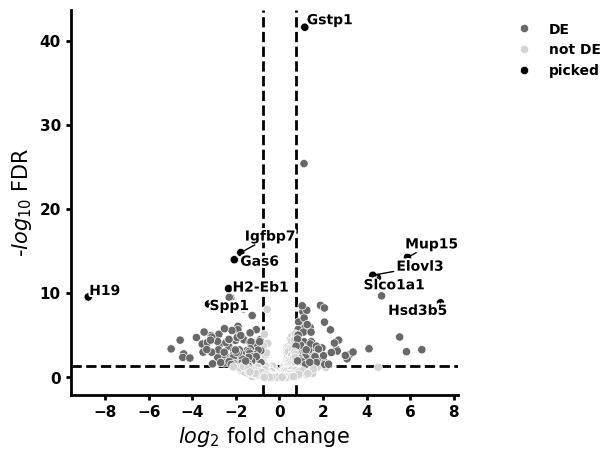

In [95]:
volcano(res,symbol='Symbol')